In [1]:
# Import most of the necessary libraries to start

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline 
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

df = pd.read_csv("iris.csv")

In [2]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.dtypes

 sepal length in cm    float64
sepal width in cm      float64
petal length in cm     float64
petal width in cm      float64
class                   object
dtype: object

In [4]:
df.shape

(150, 5)

In [5]:
# Update the column headers for simplicity and readability 
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


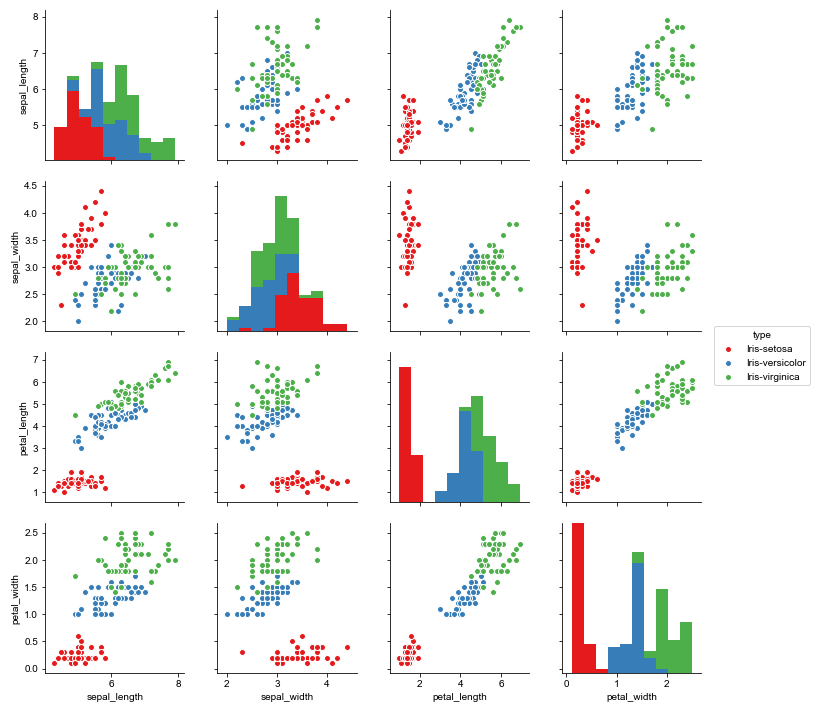

In [6]:
# Visualize the dataset with different combination of plots and histograms according to iris type
sns.pairplot(data=df, hue='type', palette='Set1')
plt.style.use('seaborn')

In [7]:
# Import Machine Learning Toolkits 
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, validation_curve
from sklearn.svm import SVC

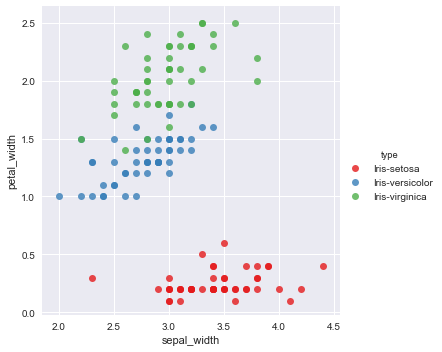

In [8]:
# Plot the iris width data 
sns.lmplot('sepal_width', 'petal_width', data = df, hue = 'type', palette = 'Set1', fit_reg = False)
plt.style.use('seaborn')

In [9]:
# Specify the inputs for the Support Vector Machines Model 
width = df[['sepal_width', 'petal_width']].as_matrix()
types = np.where(df['type'] == 'Iris-setosa', 0,1)

In [10]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[0.001, 0.01, 0.1, 1, 10, 20, 30, 50, 100],'gamma': [0.001, 0.01, 0.1, 1]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(width, types)
clf.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [21]:
# Since the GridSearchCV parameters are a bit too complex, the C value is going to be much higher to simplify the model
model = SVC(kernel = 'linear', C = 100)
model.fit(width, types)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
# Plot the hyperplane
w = model.coef_ [0]
a = -w[0] / w[1]
xx = np.linspace(2, 5)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the margin lines that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

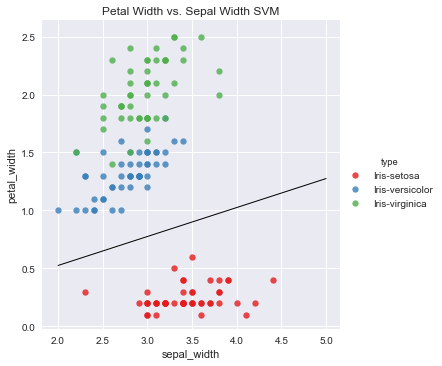

In [23]:
# Plot the hyperplane
sns.lmplot('sepal_width', 'petal_width', data=df, hue='type', palette='Set1', fit_reg=False, scatter_kws={"s": 40})
plt.plot(xx, yy, linewidth=1, color='black')
plt.title("Petal Width vs. Sepal Width SVM")
plt.style.use('seaborn')

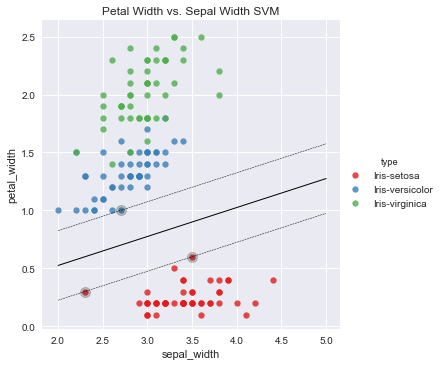

In [24]:
# Plot the hyperplane, margins and designate the model's support vectors
plt.style.use('seaborn')
sns.lmplot('sepal_width', 'petal_width', data=df, hue='type', palette='Set1', fit_reg=False, scatter_kws={"s": 40})
plt.plot(xx, yy, linewidth=1, color= 'black')
plt.plot(xx, yy_down, 'k--', linewidth = 0.5)
plt.plot(xx, yy_up, 'k--', linewidth = 0.5)
plt.title("Petal Width vs. Sepal Width SVM")
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 100, lw = 1, facecolors='black', alpha = 0.20)

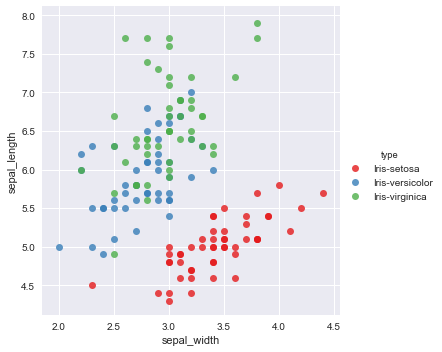

In [15]:
# In this example, the sepal length data will be used for a more complex linear separation
# Plot the sepal length data 
sns.lmplot('sepal_width', 'sepal_length', data = df, hue = 'type', palette = 'Set1', fit_reg = False)
plt.style.use('seaborn')

In [25]:
# Specify the inputs for the Support Vector Machines Model 
length = df[['sepal_width', 'sepal_length']].as_matrix()
types_ = np.where(df['type'] == 'Iris-setosa', 0,1)

{'C': 0.001, 'gamma': 1, 'kernel': 'poly'}

In [41]:
# Create New Model
model_ = SVC(kernel = 'linear', C = 200)
model_.fit(length, types_)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
# Plot the hyperplane (SVM formula)
w = model_.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(2, 4.5)
yy = a * xx - (model_.intercept_[0]) / w[1]

# Plot the lines that pass through the support vectors
b = model_.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model_.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

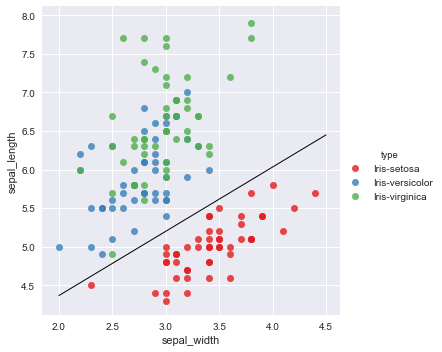

In [43]:
# Plot the iris length data 
sns.lmplot('sepal_width', 'sepal_length', data = df, hue = 'type', palette = 'Set1', fit_reg = False)
plt.plot(xx, yy, linewidth = 1, color = 'black')
plt.style.use('seaborn')

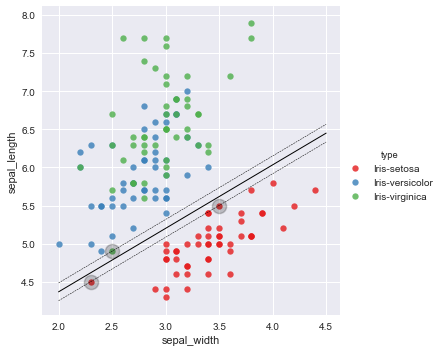

In [44]:
# Plot the iris length data 
plt.style.use('seaborn')
sns.lmplot('sepal_width', 'sepal_length', data=df, hue='type', palette='Set1', fit_reg=False, scatter_kws={"s": 40})
plt.plot(xx, yy, linewidth=1, color= 'black')
plt.plot(xx, yy_down, 'k--', linewidth = 0.5)
plt.plot(xx, yy_up, 'k--', linewidth = 0.5)
plt.scatter(model_.support_vectors_[:, 0], model_.support_vectors_[:, 1], s = 200, lw = 1.5, facecolors='black', alpha = 0.20)